In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sensors import *
from functools import partial

In [2]:
# Отношение расстояния между датчиками к длине волны
dist_ratio = 0.5

In [3]:
Num_sensors1 = 5
Num_emitters1 = 1
sample_size1 = 100
theta1_rad = [0.5] # Направление прибытия (DOA) в радианах
# Истинное DOA в градусах
theta1_deg = rad_to_deg(theta1_rad[0])
GS_1 = np.array([[0.7]]) # Ковариация сигнала
GN_1 = 4.1*np.eye(5, dtype=np.float64) # Ковариация шума
A1 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors1).reshape(-1,1) * np.sin(theta1_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s1 = CN(Num_emitters1, sample_size1, GS_1)
n1 = CN(Num_sensors1, sample_size1, GN_1)
X1 = (A1 @ s1.T + n1.T).T

In [4]:
EM_theta1_rad, neglhd_1, K1, mu1 = multi_start(10, X1, GS_1, GN_1, max_iter=50, eps=1e-6)

0-th start
Iteration=1, theta_new=[-1.12510664], -likelihood = -76.82816
Iteration=2, theta_new=[-1.13526996], -likelihood = -77.01815
Iteration=3, theta_new=[-1.14485989], -likelihood = -77.18165
Iteration=4, theta_new=[-1.15391591], -likelihood = -77.32137
Iteration=5, theta_new=[-1.16242378], -likelihood = -77.44063
Iteration=6, theta_new=[-1.17037004], -likelihood = -77.54177
Iteration=7, theta_new=[-1.17779915], -likelihood = -77.62696
Iteration=8, theta_new=[-1.18470031], -likelihood = -77.69875
Iteration=9, theta_new=[-1.19117914], -likelihood = -77.75886
Iteration=10, theta_new=[-1.19716994], -likelihood = -77.80970
Iteration=11, theta_new=[-1.20272322], -likelihood = -77.85206
Iteration=12, theta_new=[-1.20789117], -likelihood = -77.88745
Iteration=13, theta_new=[-1.21266847], -likelihood = -77.91715
Iteration=14, theta_new=[-1.2171094], -likelihood = -77.94190
Iteration=15, theta_new=[-1.22121001], -likelihood = -77.96266
Iteration=16, theta_new=[-1.22496666], -likelihood = -

In [5]:
print(f"Погрешность в смысле разности углов: {np.abs(EM_theta1_rad-theta1_rad)}.\nПогрешность в смысле разности синусов углов {np.abs(np.sin(EM_theta1_rad)-np.sin(theta1_rad))}.")

Погрешность в смысле разности углов: [0.01214591].
Погрешность в смысле разности синусов углов [0.01062341].


In [6]:
Num_sensors2 = 5
Num_emitters2 = 2
sample_size2 = 100
theta2_rad = np.array([0.34906585, 1.22173048]) # Направление прибытия (DOA) в радианах
GS_2 = np.array([[2,0],[0,3]]) # Ковариация сигнала
GN_2 = 7.1*np.eye(5, dtype=np.float64) # Ковариация шума
A2 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors2).reshape(-1,1) * np.sin(theta2_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s2 = CN(Num_emitters2, sample_size2, GS_2)
n2 = CN(Num_sensors2, sample_size2, GN_2)
X2 = (A2 @ s2.T + n2.T).T

In [7]:
EM_theta2_rad, neglhd_2, K2, mu2 = multi_start(10, X2, GS_2, GN_2, max_iter=20, eps=1e-6)

0-th start
Iteration=1, theta_new=[-2.53041461 -1.52487028], -likelihood = -372.38713
Iteration=2, theta_new=[-2.53020187 -1.57077491], -likelihood = -375.00828
Iteration=3, theta_new=[-2.52988752 -1.57081161], -likelihood = -375.08694
Iteration=4, theta_new=[-2.5295601  -1.57081358], -likelihood = -375.09222
Iteration=5, theta_new=[-2.52926869 -1.57084628], -likelihood = -375.09770
Iteration=6, theta_new=[-2.52899438 -1.57076995], -likelihood = -375.10257
Iteration=7, theta_new=[-2.52872932 -1.57075303], -likelihood = -375.10714
Iteration=8, theta_new=[-2.528469   -1.57075703], -likelihood = -375.11154
Iteration=9, theta_new=[-2.52820466 -1.57081776], -likelihood = -375.11586
Iteration=10, theta_new=[-2.52794334 -1.57079833], -likelihood = -375.12023
Iteration=11, theta_new=[-2.52771379 -1.57084459], -likelihood = -375.12454
Iteration=12, theta_new=[-2.52749161 -1.57077169], -likelihood = -375.12831
Iteration=13, theta_new=[-2.52725015 -1.57077751], -likelihood = -375.13196
Iteration=

In [8]:
print(f"Погрешность в смысле разности углов: {np.abs(EM_theta2_rad-theta2_rad)}.\nПогрешность в смысле разности синусов углов {np.abs(np.sin(EM_theta2_rad)-np.sin(theta2_rad))}.")

Погрешность в смысле разности углов: [0.03062023 0.02713363].
Погрешность в смысле разности синусов углов [0.02892943 0.00893321].


## Теперь имеет смысл определить примерный вид функции, оптимизируемой на М-шаге:

In [9]:
W1, W2 = goal_function(X1, GS_1, GN_2, 50)

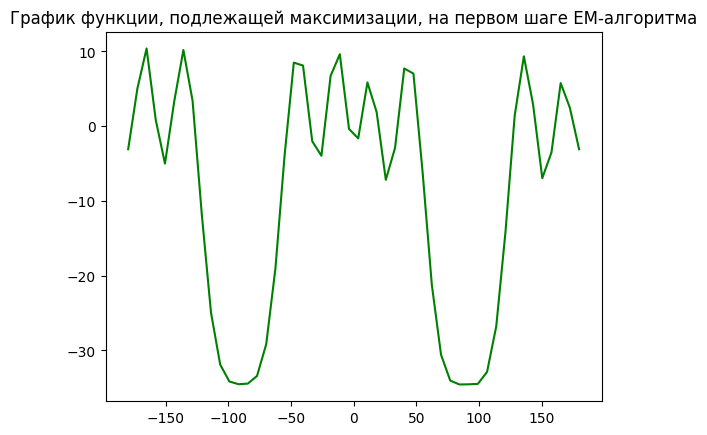

In [10]:
plt.title("График функции, подлежащей максимизации, на первом шаге ЕМ-алгоритма")
plt.plot(rad_to_deg(W1), W2.real, color='green')

In [11]:
# Переведем оценку угла прибытия в градусы
EM_theta1_deg = rad_to_deg(EM_theta1_rad[0])

In [12]:
EM_theta1_deg

29.34379901653548

Теперь проведем сравнение с **CAPON**:

In [13]:
R = space_covariance_matrix(X1)
angles = np.linspace(-1*np.pi, np.pi, 1000)
Powers = []
for angle in angles:
    a = steering_vector(dist_ratio, angle, 5)
    Powers.append(capon_func(a,R).real)

In [14]:
angles[np.argmax(Powers)]*180/np.pi

29.369369369369345

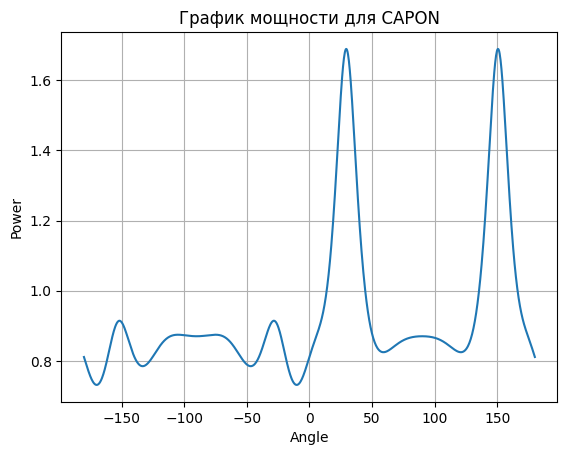

In [15]:
plt.title("График мощности для CAPON")
plt.plot(angles*180/np.pi, Powers) 
plt.xlabel("Angle")
plt.ylabel("Power")
plt.grid()
plt.show()

In [16]:
angles_near = np.linspace(0.5-0.1, 0.5+0.1, 100)
Powers_near = []
for angle in angles_near:
    a = steering_vector(dist_ratio, angle, 5)
    Powers_near.append(capon_func(a,R).real)

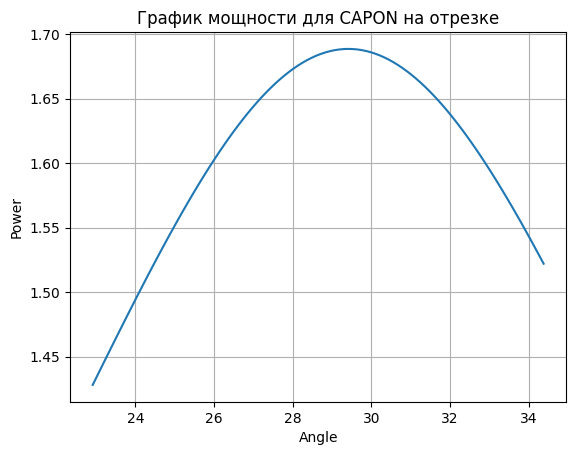

In [17]:
plt.title("График мощности для CAPON на отрезке")
plt.plot(rad_to_deg(angles_near), Powers_near) 
plt.xlabel("Angle")
plt.ylabel("Power")
plt.grid()
plt.show()

# Оценка **CAPON** в градусах

In [18]:
capon_theta1_deg = rad_to_deg(angles_near[np.argmax(Powers_near)])

In [19]:
capon_theta1_deg

29.40025857843012

In [20]:
# ЕМ-оценка
EM_theta1_deg

29.34379901653548

In [21]:
# Истинное значение
theta1_deg

28.64788975654116

In [27]:
Num_sensors3 = 7
Num_emitters3 = 3
sample_size3 = 100
theta3_rad = [0.5, 1.2, 2.4] # Направление прибытия (DOA) в радианах
# Истинное DOA в градусах
theta3_deg = rad_to_deg(theta3_rad[0])
GS_3 = np.diag([0.1, 0.5, 0.9]) # Ковариация сигнала
GN_3 = 4.1*np.eye(7, dtype=np.float64) # Ковариация шума
A3 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors3).reshape(-1,1) * np.sin(theta3_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s3 = CN(Num_emitters3, sample_size3, GS_3)
n3 = CN(Num_sensors3, sample_size3, GN_3)
X3 = (A3 @ s3.T + n3.T).T

In [28]:
EM_theta3_rad, neglhd_3, K3, mu3 = multi_start(20, X3, GS_3, GN_3, max_iter=50, eps=1e-6)

0-th start
Iteration=1, theta_new=[0.54578513 2.52959138 0.41159681], -likelihood = -227.29227
Iteration=2, theta_new=[0.57167833 2.50305527 0.39930905], -likelihood = -259.15535
Iteration=3, theta_new=[0.59137892 2.48154787 0.39159082], -likelihood = -277.08744
Iteration=4, theta_new=[0.60621864 2.46345679 0.38678465], -likelihood = -288.53349
Iteration=5, theta_new=[0.61731085 2.44793533 0.38397361], -likelihood = -296.48466
Iteration=6, theta_new=[0.62545649 2.43448057 0.38246695], -likelihood = -302.28604
Iteration=7, theta_new=[0.6313049  2.42274496 0.38189588], -likelihood = -306.65186
Iteration=8, theta_new=[0.63540982 2.41243076 0.38199377], -likelihood = -310.01204
Iteration=9, theta_new=[0.63831835 2.40332467 0.38250538], -likelihood = -312.65593
Iteration=10, theta_new=[0.64029587 2.39523597 0.38336397], -likelihood = -314.77000
Iteration=11, theta_new=[0.64171315 2.38807324 0.38448044], -likelihood = -316.48845
Iteration=12, theta_new=[0.64277323 2.38173306 0.38575618], -li

In [29]:
EM_theta3_rad

array([0.42776583, 1.25422557, 0.75250731])